In [404]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

doc = pd.read_csv('Portuguese_banking.csv')

df = doc.copy()

In [405]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [407]:
quartile1 = df['age'].quantile(0.25)
quartile3 = df['age'].quantile(0.75)
inter_quartile_range = quartile3 - quartile1
lower_case = quartile1 - 1.5 * inter_quartile_range
upper_case = quartile3 + 1.5 * inter_quartile_range

df[(df['age'] > lower_case) & (df['age'] < upper_case)]

# There are a lot of outliers in DataFrame so, there is no any logic if we try to press outliers in the range of lower_case and upper_case

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [408]:
df[df.duplicated()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
24831,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,no
28456,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,no
29543,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,no
30807,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,no
32607,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,no


In [409]:
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'distrubution of age')

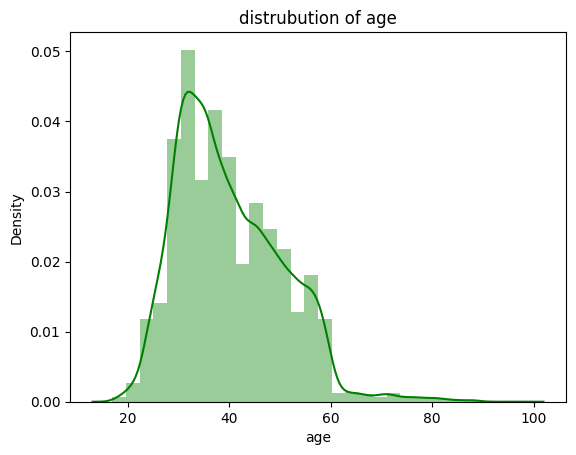

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['age'].dropna(), kde=True, bins=30, color='Green').set_title('distrubution of age')

In [411]:
df.drop(columns=['age', 'duration', 'pdays' , 'y'])

df_get_dum = pd.get_dummies(df.drop(columns=['age', 'duration', 'pdays' , 'y']))

df = pd.concat([df_get_dum, df[['age', 'duration', 'pdays' ]]], axis=1)
df

,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,pdays
0,4,0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,49,227,999
1,2,1,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,37,202,999
2,1,0,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,78,1148,999
3,2,0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,36,120,999
4,2,0,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,59,368,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,1,0,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,28,192,999
32946,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,52,64,999
32947,4,0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,54,131,999
32948,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,29,165,999


In [412]:
corr = df.corr().abs()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,pdays
campaign,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
previous,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_admin.,0.01,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_blue-collar,0.00,0.06,0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_entrepreneur,0.00,0.01,0.11,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_housemaid,0.01,0.01,0.09,0.09,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_management,0.01,0.01,0.16,0.15,0.05,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_retired,0.01,0.06,0.12,0.11,0.04,0.03,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_self-employed,0.01,0.01,0.11,0.10,0.04,0.03,0.05,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
job_services,0.00,0.01,0.19,0.18,0.06,0.05,0.09,0.07,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [413]:
columns_to_drop = ['job_unemployed', 'marital_unknown', 'education_illiterate', 'loan_yes', 'day_of_week_wed'] # columns with low corellatioln

df.drop(columns=columns_to_drop, inplace=True)

df = pd.concat([df, doc[['y']]], axis=1) # concat y column for prediction

df.isnull().sum()
df.dropna(inplace=True) # null values is deleted after preprosessing

In [414]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype(int)
x = df.drop('y' , axis=1)
y = df['y']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , stratify=y, random_state=123)

In [415]:
from sklearn.linear_model import LogisticRegression

lgmodel = LogisticRegression()

lgmodel.fit(x_train , y_train)

lg_pred = lgmodel.predict(x_test)

# Checking model with accuracy scores

from sklearn.metrics import accuracy_score

accuracy_score(y_test , lg_pred)

from sklearn.metrics import classification_report

print(classification_report(y_test , lg_pred))



              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5847
           1       0.61      0.34      0.44       742

    accuracy                           0.90      6589
   macro avg       0.77      0.66      0.69      6589
weighted avg       0.89      0.90      0.89      6589



In [416]:
df['y']

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32942, dtype: int32

In [428]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

df = pd.get_dummies(df, drop_first=True)

x = df.drop('y' , axis=1)
y = df['y']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , stratify=y, random_state=123)
import xgboost as xgb

xgmodel = xgb.XGBClassifier()

xgmodel.fit(x_train , y_train)

xg_pred = xgmodel.predict(x_test)

# Checking model with accuracy scores


from sklearn.metrics import classification_report

print(classification_report(y_test , xg_pred))

from sklearn.metrics import accuracy_score

print('Acurracy score:', accuracy_score(y_test , lg_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5847
           1       0.58      0.46      0.52       742

    accuracy                           0.90      6589
   macro avg       0.76      0.71      0.73      6589
weighted avg       0.89      0.90      0.90      6589

Acurracy score: 0.9015025041736227


In [431]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV



lgb_model = lgb.LGBMClassifier()

param = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'num_leaves': [10, 20, 30, 40, 50],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}


n_iter_search = 20  
random_search = RandomizedSearchCV(lgb_model, param_distributions=param,
                                   n_iter=n_iter_search, cv=3, random_state=123)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test , y_pred))

[LightGBM] [Info] Number of positive: 1980, number of negative: 15588
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 17568, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112705 -> initscore=-2.063405
[LightGBM] [Info] Start training from score -2.063405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga